# <center>Đồ án 02 - Phân Tích Dữ Liệu</center>

## Mục lục
* [Bảng phân công công viêc](#c1)
* [Cách chạy Project](#c2)
* [Nội dung](#c3)
    * [Mong đợi những gì ở dữ liệu ?](#c31)
    * [Danh sách kiểm tra phân tích dữ liệu](#c32)
    * [Trả lời những câu hỏi về bộ dữ liệu](#c33)    
    * [Xóa dữ liệu](#c34)
        * [Dữ liệu có bị thiếu ?](#c341)
        * [Kiểu dữ liệu](#c342)
        * [Kiểm tra ngoại lệ](#c343)
        * [Tiền xử lý dữ liệu](#c344)
    * [Phân tích khám phá](#c35)
        * [Trực quan hoá mối quan hệ đơn biến](#c351)
        * [Trực quan hoá mối quan hệ đa biến](#c352)
            * [Correlation Matrix](#c3521)

## BẢNG PHÂN CÔNG CÔNG VIỆC <a class="anchor" id="c1"></a>

STT&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Thông tin sinh viên&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Mức độ hoàn thành&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Công việc
<br>
1&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;Nguyễn Đăng Thi-19127276&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Scatterplot, Pie chart, Bar chart
<br>
2&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Lê Minh Trí-19127592&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Histogram, Boxplot
<br>
3&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Phan Vĩ Giai-19127639&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Xóa dữ liệu, Correlation Matrix
<br>
4&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Võ Nhất Huy-19127642&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Trả lời câu hỏi về dữ liệu, Line chart

## CÁCH CHẠY PROJECT <a class="anchor" id="c2"></a>
**Chọn Kernel -> Restart & Run All**

## Nội dung <a class="anchor" id="c3"></a>

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
playlists_file = './Api_data/playlists.csv'
tracks_file = './Api_data/tracks.csv'
users_file = './Api_data/users.csv'

<strong>Biến toàn cục</strong>
<br>
Đọc dữ liệu dưới dạng DataFrame

In [3]:
df_playlists = pd.read_csv(playlists_file, delimiter='\t')
df_tracks = pd.read_csv(tracks_file, delimiter='\t')
df_users= pd.read_csv(users_file, delimiter='\t')

### Mong đợi những gì ở dữ liệu ? <a class="anchor" id="c31"></a>

### Danh sách kiểm tra phân tích dữ liệu <a class="anchor" id="c32"></a>

### Trả lời những câu hỏi về bộ dữ liệu <a class="anchor" id="c33"></a>

### Xóa dữ liệu <a class="anchor" id="c34"></a>

In [4]:
def get_object(file_name):
    df = pd.read_csv(file_name, delimiter='\t')
    obj = {}
    for column in df.columns:
        obj.setdefault(column, df[column].values)
    return obj

In [5]:
def get_object_formatted(cols):
    formatted_obj = {}
    for key in cols.keys():
        col_values = cols[key]
        missing_values = [x for x in col_values if x == '' or (not isinstance(x, str) and math.isnan(x))]
        values = [x for x in col_values if x != '' and not (not isinstance(x, str) and math.isnan(x))]
        formatted_obj[key] = [len(missing_values)/len(col_values) * 100, len(set(values)), set(values)]
    return formatted_obj

In [6]:
def print_info(obj):
    print(f"{'ColName':20} {'Miss(%)':7} {'NumDifVals':10} {'SomeVals'}")
    for col_name, col_profile in obj.items():
        print(f'{col_name:20} {col_profile[0]:<7.3f} {col_profile[1]:<10} {col_profile[2].__repr__()[:34]+"...":<}')

### Dữ liệu có bị thiếu ? <a class="anchor" id="c341"></a>

In [7]:
playlists_obj = get_object_formatted(get_object(playlists_file))
tracks_obj = get_object_formatted(get_object(tracks_file))
users_obj = get_object_formatted(get_object(users_file))

In [8]:
print_info(playlists_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   2175       {52264968, 729101, 39485458, 10671...
user_id              0.000   632        {7, 9, 11, 16, 17, 20, 21, 24, 25,...
title                0.000   2082       {'Tangent Saw #006 - Sequoia', 'De...
created_at           0.000   2175       {'2013-12-03T20:12:37Z', '2009-02-...
last_modified        0.000   2138       {'2013-05-09T17:00:08Z', '2015-09-...
license              0.000   6          {'cc-by-nc', 'all-rights-reserved'...
likes_count          0.000   194        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
permalink_url        0.000   2175       {'https://soundcloud.com/kokleasof...
public               0.000   1          {True}...
purchase_url         1.195   428        {'http://moonson.bandcamp.com/albu...
reposts_count        0.000   75         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
secret_token         0.000   1          {'None'}...
sharing              0.000   1          {'public'}...
tag_list       

In [9]:
print_info(tracks_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   10242      {336297989, 44204041, 1140686857, ...
user_id              0.000   2768       {336748548, 19554314, 7184394, 258...
title                0.000   10190      {'DCR398 - Drumcode Radio Live - A...
description          17.874  6040       {'MIRA 新伝統 w/ Ψυχή - 5th November ...
track_format         0.000   1          {'single-track'}...
uri                  0.000   10242      {'https://api.soundcloud.com/track...
caption              0.000   132        {'Enjoy the official first single ...
comment_count        0.000   569        {'1776', '120', '251', '145', '113...
created_at           0.000   9765       {'2016-03-08T12:43:47Z', '2012-08-...
duration             0.000   8435       {458752, 7372800, 327680, 98307, 0...
genre                13.451  1973       {'abstract hip-hop', 'Ambiente', '...
last_modified        0.000   9107       {'2020-01-16T08:47:18Z', '2020-12-...
license              0.000   8   

In [10]:
print_info(users_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   1763       {1, 2, 6, 7, 8, 9, 10, 11, 12, 15,...
username             0.000   1763       {'mbg', 'olof dohnhammar', 'dave e...
first_name           19.399  943        {'aka Two Who', 'Christopher', 'Di...
last_name            27.907  1198       {'Pesce', 'de togni', 'Richardson'...
full_name            18.945  1418       {'Ed Unlike', 'Ran  Shani', 'yaron...
city                 8.281   437        {'(N)irgends(wo?!)', 'Berlin/Tokyo...
avatar_url           0.000   1409       {'https://i1.sndcdn.com/avatars-00...
playlist_count       0.000   65         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
track_count          0.000   181        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 515...
description          16.846  785        {'http://www.korallreven.se', 'New...
followers_count      0.000   961        {0, 2049, 1, 3, 4, 5, 6, 7, 8, 9, ...
followings_count     0.000   523        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
groups_count   

### Kiểu dữ liệu <a class="anchor" id="c342"></a>

In [11]:
df_playlists.dtypes

id                int64
user_id           int64
title            object
created_at       object
last_modified    object
license          object
likes_count       int64
permalink_url    object
public             bool
purchase_url     object
reposts_count     int64
secret_token     object
sharing          object
tag_list         object
uri              object
set_type         object
is_album           bool
trackIds         object
dtype: object

In [12]:
df_tracks.dtypes

id                 int64
user_id            int64
title             object
description       object
track_format      object
uri               object
caption           object
comment_count     object
created_at        object
duration           int64
genre             object
last_modified     object
license           object
likes_count       object
permalink_url     object
playback_count    object
reposts_count      int64
state             object
dtype: object

In [13]:
df_users.dtypes

id                       int64
username                object
first_name              object
last_name               object
full_name               object
city                    object
avatar_url              object
playlist_count           int64
track_count              int64
description             object
followers_count          int64
followings_count         int64
groups_count             int64
likes_count              int64
comments_count           int64
playlist_likes_count     int64
last_modified           object
created_at              object
verified                  bool
dtype: object

### Kiểm tra ngoại lệ <a class="anchor" id="c343"></a>

### Tiền xử lý dữ liệu <a class="anchor" id="c344"></a>

In [14]:
def format_empty_vals(df):
    for column in df.columns:
        if 'count' in column:
            df[column] = df[column].replace('None', 0)
            df[column] = df[column].astype(str).astype(int)
        else:
            df[column] = df[column].replace(float('nan'), 'None')        

In [15]:
format_empty_vals(df_playlists)
format_empty_vals(df_tracks)
format_empty_vals(df_users)

### Phân tích khám phá <a class="anchor" id="c35"></a>

#### Trực quan hoá mối quan hệ đơn biến <a class="anchor" id="c351"></a>

In [16]:
# Huy


In [17]:
# Thi


In [18]:
# Tri


#### Trực quan hoá mối quan hệ đa biến <a class="anchor" id="c352"></a>

##### Correlation Matrix <a class="anchor" id="c3521"></a>

<AxesSubplot:>

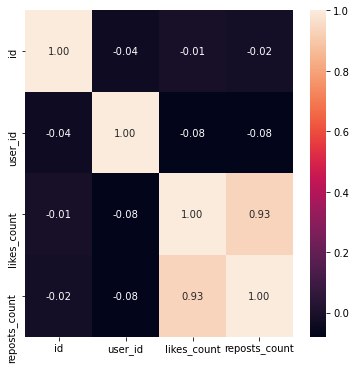

In [19]:
fig = plt.figure(figsize=(6,6))
corr = df_playlists.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

<AxesSubplot:>

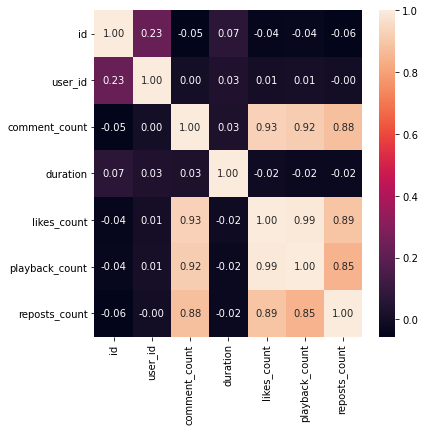

In [20]:
fig = plt.figure(figsize=(6,6))
corr = df_tracks.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

<AxesSubplot:>

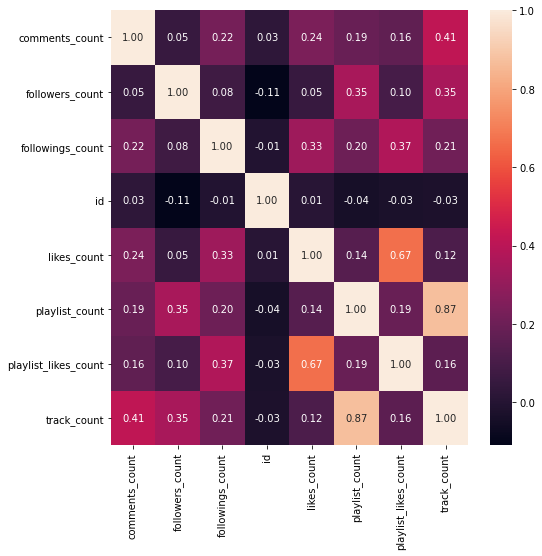

In [21]:
fig = plt.figure(figsize=(8,8))
corr = df_users[df_users.columns.difference(['groups_count'])]
corr = corr.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')